<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Análisis-de-sentimiento" data-toc-modified-id="Análisis-de-sentimiento-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Análisis de sentimiento</a></span></li></ul></li></ul></li><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Wordcloud</a></span><ul class="toc-item"><li><span><a href="#Por-tipo-de-comentarios" data-toc-modified-id="Por-tipo-de-comentarios-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Por tipo de comentarios</a></span></li><li><span><a href="#Por-clase-de-hotel" data-toc-modified-id="Por-clase-de-hotel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Por clase de hotel</a></span></li></ul></li></ul></div>

![](https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg)

El objetivo es analizar las palabras que  más se repiten en función si el comentario es positivo, negativo o neutro y por la clase de hotel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

In [2]:
comentarios = pd.read_csv("tripadvisor_hotel_reviews.csv")
comentarios.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


**Número de instancias**

In [3]:
print("Nº de instancias:",comentarios.shape[0])

Nº de instancias: 20491


**Tipos de variable**

In [4]:
comentarios.dtypes

Review    object
Rating     int64
dtype: object

**¿Existen valores nulos?**

In [5]:
comentarios.isnull().sum()

Review    0
Rating    0
dtype: int64

**¿Qué clases de hoteles tenemos?**

In [6]:
comentarios.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

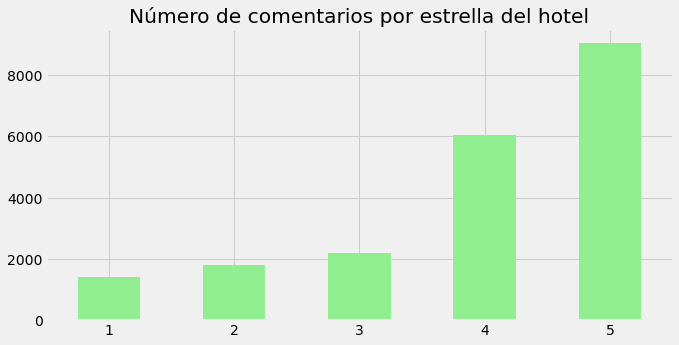

In [7]:
comentarios.Rating.value_counts(sort=False).plot.bar(figsize=(10,5),rot=0,
                                                     title="Número de comentarios por estrella del hotel",
                                                     color="lightgreen")
plt.show()

In [8]:
comentarios.Review[101]

"dump stayed weekend expected charming 1929 property based web-site reviews expedia, did n't expect charming mean incompetent staff showers randomly scalding cold medium pressure just trickle tacky acoustic ceilings moldy non-functional windows shower no screens windows no a/c having room left unlocked maid service having wait 18 hours iron gave 30 minutes make wedding having car 8am parking thought desk reality n't etc. etc.expedia apparantly wo n't publish negative reviews like gather having tried 3 times publish on-line calling customer service exchanging e-mails, beware reviews expedia especially beware hotels like,  "

#### Análisis de sentimiento

In [9]:
from textblob import TextBlob

In [10]:
def analisis_sentimiento(df):
    blob=TextBlob(df.Review)
    sentiment=blob.sentiment.polarity
    return sentiment

In [11]:
%%time
comentarios["SA_ranking"]=comentarios.apply(analisis_sentimiento,axis=1)

Wall time: 9.86 s


In [12]:
comentarios.iloc[np.random.randint(0,comentarios.shape[0],15),]

,Review,Rating,SA_ranking
3531,nice room improvement wife just returned 8 nig...,4,0.204355
5544,"great location helpful staff stay, hotel bales...",4,0.426136
1617,expect quirks fine chancellor exactly expected...,4,0.282619
2559,poor quality attended company convention ec 24...,2,-0.110714
15461,"beautiful hotel absolutely class hotel, entran...",5,0.355000
5847,"sofitel delivers just 5 days ny, chose sofitel...",4,0.360526
10853,star quality star hotel partner planned day ho...,5,0.244839
8045,good hotel good location spent 3 nights charle...,4,0.222639
12091,nothing special stayed 11-14 sep. reception im...,2,0.056710
10471,bargain watch ur wallet tight budget hotel bri...,3,0.339418


**Comentario más positivo**

In [13]:
cmp = comentarios.iloc[comentarios.SA_ranking.idxmax]
print("Clase de hotel:",cmp.Rating)
cmp.Review

Clase de hotel: 5


'absolutely wonderful wonderful serene oasis city millions, steps away times square entering hotel peacefulness eveloping, lounge wonderful treat morning afternoon, wonderful treated meet travellers business people share experiences.loved,  '

**Comentario más negativo**

In [14]:
cmn = comentarios.iloc[comentarios.SA_ranking.idxmin]
print("Clase de hotel:",cmn.Rating)
cmn.Review

Clase de hotel: 1


'worst location does say place eat sub place, make order bullet proof glass,  '

**Categorizando los comentarios**

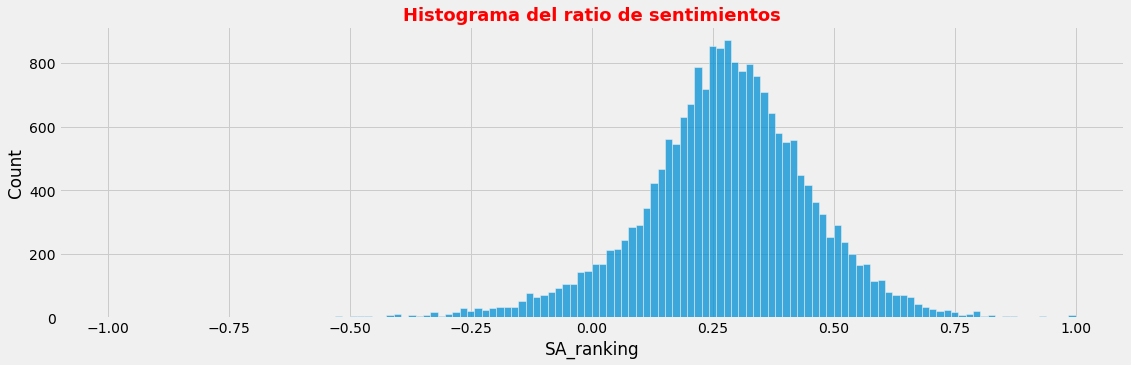

In [15]:
plt.figure(figsize=(17,5))
plt.title("Histograma del ratio de sentimientos",fontsize=18,color='red',fontweight="bold")
sns.histplot(comentarios.SA_ranking)
plt.show()

In [16]:
def sentiment(ratio):
    if ratio <=-0.01:
        return "negative"
    elif ratio >=0.10:
        return "positive"
    else: return "neutral"
comentarios["Sentiment"]=comentarios['SA_ranking'].apply(lambda x: sentiment(x))

In [17]:
comentarios.iloc[np.random.randint(0,comentarios.shape[0],15),:]

,Review,Rating,SA_ranking,Sentiment
4576,good location comfortable hotel majestic comfo...,5,0.149164,positive
6568,"absolutely faultless, stayed hotel nights new ...",5,0.243518,positive
9157,good hotel good hotel centre paris close river...,4,0.416667,positive
15427,"great location, visit singapore undecided best...",4,0.258854,positive
16934,loved stayed jurys 1st november 5th 2006 thoug...,5,0.504167,positive
13850,great beach getaway girlfriends just returned ...,5,0.418202,positive
5986,"great place, husband just returned hawaii, spe...",4,0.260036,positive
14219,jan. 19 22nd terrible food service written rev...,2,-0.024027,negative
20430,"nice surprise stay near toronto airport years,...",4,0.307184,positive
14233,"paradisus wonderful, bf stayed paradisus pr ro...",4,0.448115,positive


In [18]:
comentarios["Sentiment"].value_counts()

positive    17664
neutral      1562
negative     1265
Name: Sentiment, dtype: int64

De cada 20 comentarios 1 es negativo

In [19]:
resumen={}
SENTIMENTS = ["positive","negative","neutral"]
for sentiment in SENTIMENTS:
    resumen[sentiment]= comentarios[comentarios["Sentiment"]==sentiment].Rating.value_counts()
resumen=pd.DataFrame(resumen)

In [20]:
resumen

,positive,negative,neutral
1,289,766,366
2,879,342,572
3,1759,109,316
4,5805,30,204
5,8932,18,104


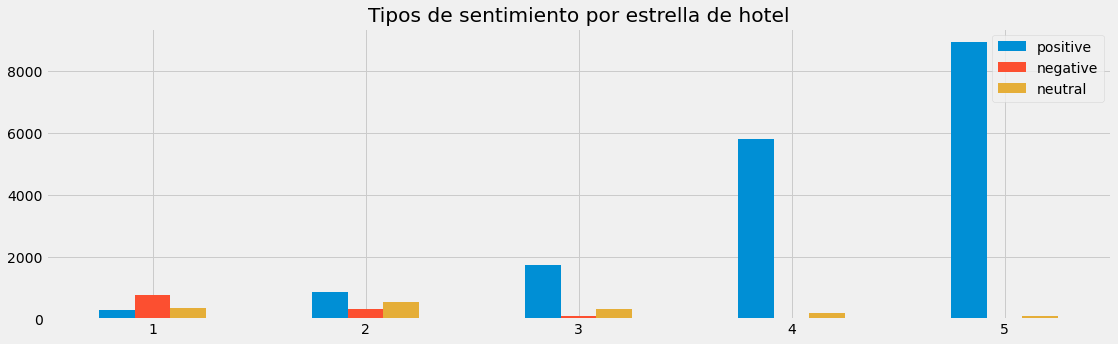

In [21]:
resumen.plot(kind="bar",figsize=(17,5),rot=0,title="Tipos de sentimiento por estrella de hotel")
plt.show()

- El volumen de comentarios positivos crece exponencialmente a medida que el hotel tiene más estrellas. 
- Solo se aprecian comentarios negativos en hoteles menores a cuatro estrellas y de forma decreciente.
- Los comentarios neutros tiene un ligero pico en hoteles de dos estrellas.

**Haciendo un filtro**

In [22]:
import ipywidgets as wg
from IPython.display import display
palabra = wg.Text(value='palabra a buscar sin paréntesis')

Text(value='angry')

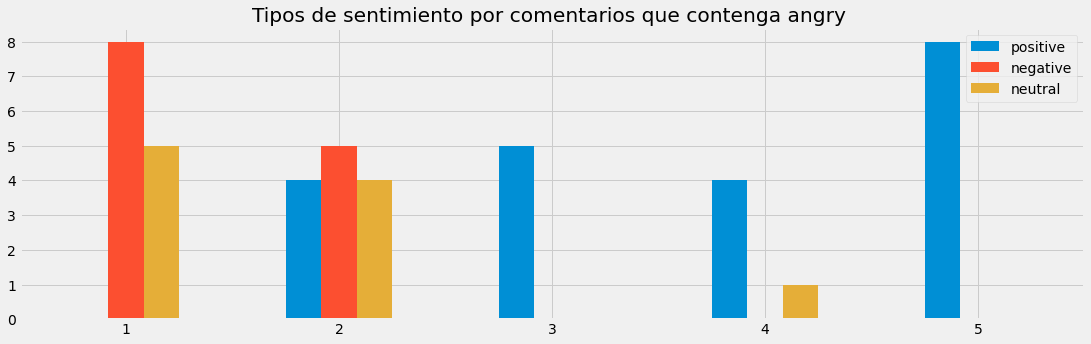

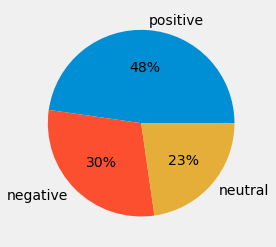

TOTAL: 44 comentarios


,Review,Rating,SA_ranking,Sentiment
3629,"watch henna tattoos, girlfriend stayed iberost...",5,0.155055,positive
20081,absolute worst vacation just returned breezes ...,1,-0.030165,negative
16852,fantastic stay brought tradesman friend hotel ...,5,0.212088,positive
15090,not great good location 2 minutes walk subway ...,2,-0.022794,negative
255,not book false information family just finishe...,1,-0.063194,negative
792,n't fooled pictures 12 hour road trip friends ...,1,0.068899,neutral
1435,better choices travelers comes location boston...,4,0.139639,positive
6035,look boyfriend arrived punta cana february 3 2...,1,-0.122083,negative
20081,absolute worst vacation just returned breezes ...,1,-0.030165,negative
7337,absolutely worst customer service encourage re...,2,-0.099444,negative


In [24]:
display(palabra)
word=palabra.value
word=" "+word+" "
comentarios_filtro=comentarios[comentarios.Review.str.contains(word,regex=False)]
res={}
for sentiment in SENTIMENTS:
    res[sentiment]= comentarios_filtro[comentarios_filtro["Sentiment"]==sentiment].Rating.value_counts()
res=pd.DataFrame(res)
res_total=res.sum()
res.plot(kind="bar",figsize=(17,5),rot=0,title="Tipos de sentimiento por comentarios que contenga{}".format(word))
plt.show()
res_total.plot(kind='pie',autopct='%.0f%%')
plt.axis('off')
plt.show()
print("TOTAL:",comentarios_filtro.shape[0],"comentarios")
comentarios_filtro.iloc[np.random.randint(0,comentarios_filtro.shape[0],20),:]

In [25]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
def chequeo(n):
    com= comentarios.iloc[n,].Review
    com=com.replace(word,"{0}{1}{2}{3}{4}".format(color.BOLD,color.RED,color.UNDERLINE,word,color.END))
    return com
print(chequeo(3629))

watch henna tattoos, girlfriend stayed iberostar punta cana june 2003 good things say, billed star hotel remember dom rep developing country star dr not going star london new york, conversely not paying 350 night, hotel room clean spacious us-sized king size bed 7ft wide, mini-bar cable balcony air-con en-suite etc.- pretty need, iberostar punta cana shares facilities ibersotar dominicana intents hotel separate receptions share bars restaurants entertainment facilities, site iberostar bavaro treated separate hotel punta cana/dominicana guest all-inclusive privileges not extend thereto vice versa, grounds hotels immaculately kept pleasant, punta cana/dominicana large pool area free-form pools surrounded sun-beds palm shades, arrive late morning best positioned beds gone no difficulty finding day, asfor beach sun-beds available constant cooling breeze, beach excellent respect clean spacious dr beaches private property unlike caribbean islands no beach vendors hassling, wrecked ship reef 

## Wordcloud

### Por tipo de comentarios

In [26]:
def adjuntar_texto(df):
    texto=df.Review.to_list()
    texto_lista=list(filter(None,texto))
    texto_cadena=" ".join(map(str,texto_lista))
    return texto_cadena

In [27]:
def adjuntar_texto(df):
    text = " ".join(i for i in df.Review)
    return text

In [28]:
for sentiment in SENTIMENTS:
    exec(f"{sentiment}_texto=adjuntar_texto(comentarios[comentarios.Sentiment=='{sentiment}'])")

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stop_w = set(STOPWORDS)
stop_w=stop_w.union({"s","room","hotel","going","day","n't"})#palabras comunes e irrelevantes
fontdict={'color':'red','size':'29','fontweight':'bold'}

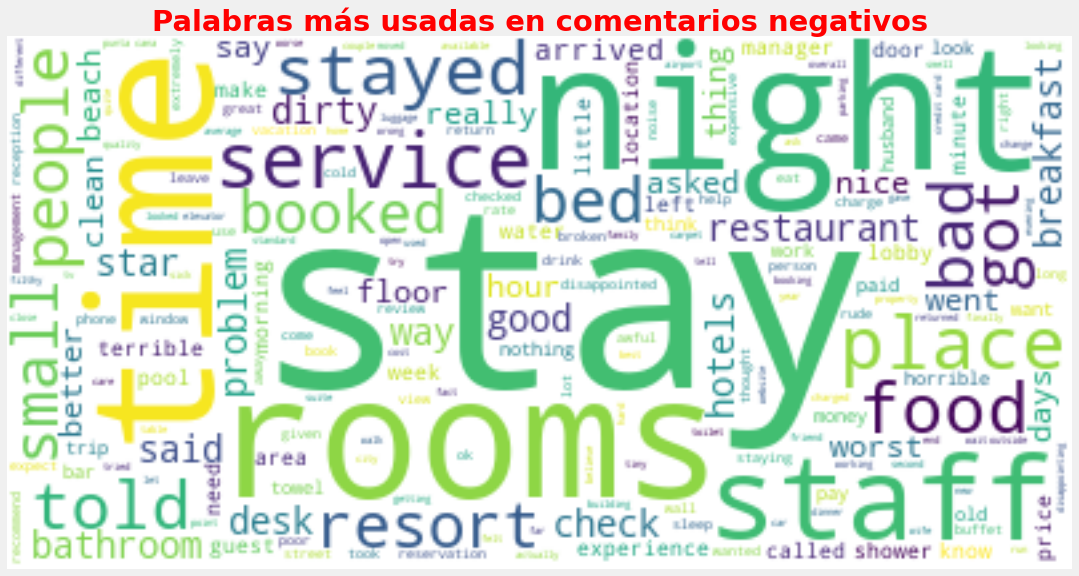

In [30]:
word_cloud = WordCloud(stopwords=stop_w,background_color="white").generate(negative_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios negativos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

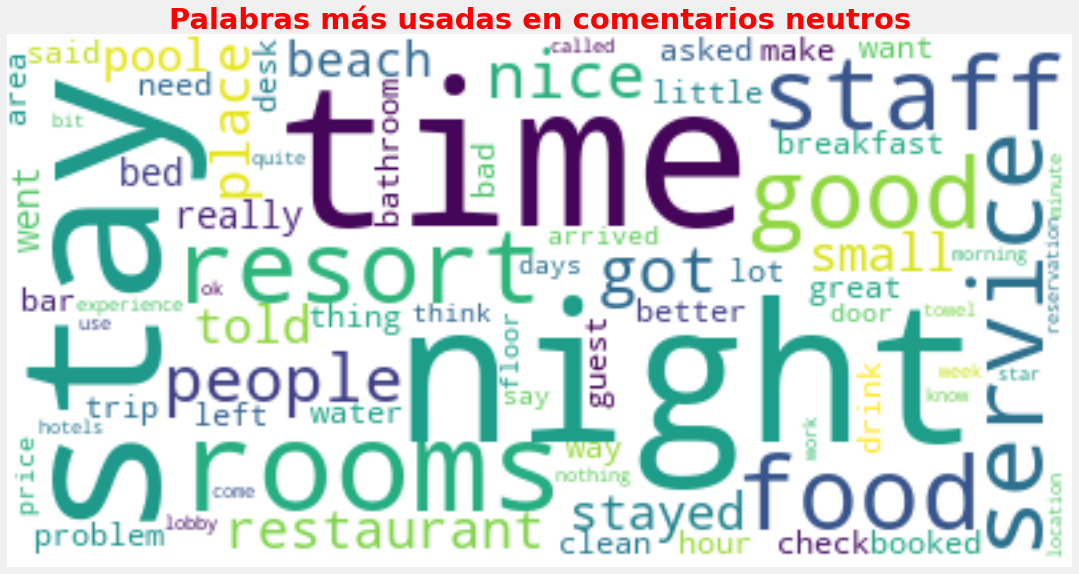

In [31]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(neutral_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios neutros",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

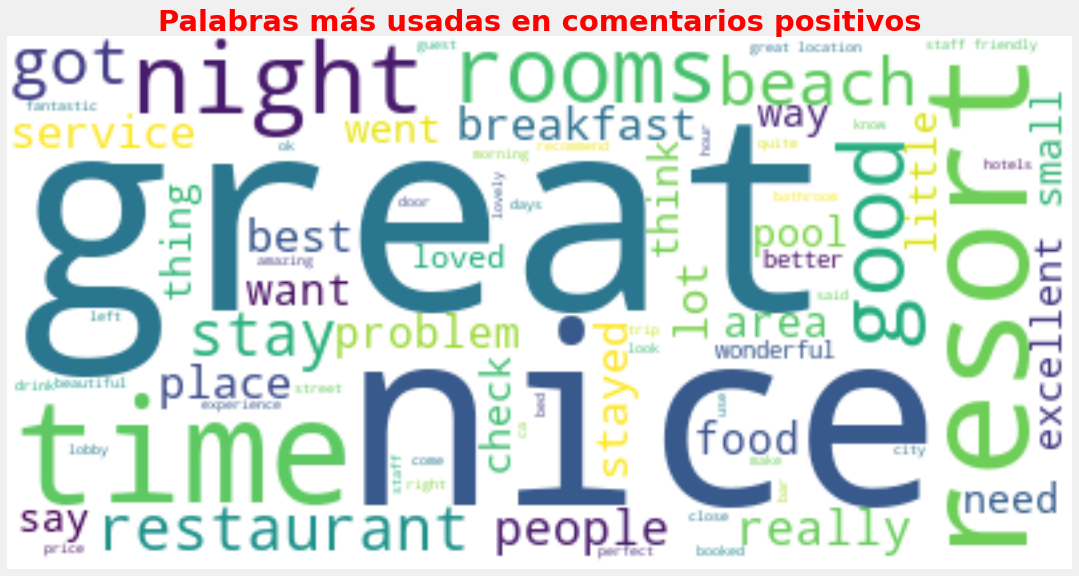

In [32]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(positive_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios positivos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

### Por clase de hotel

In [33]:
from PIL import Image

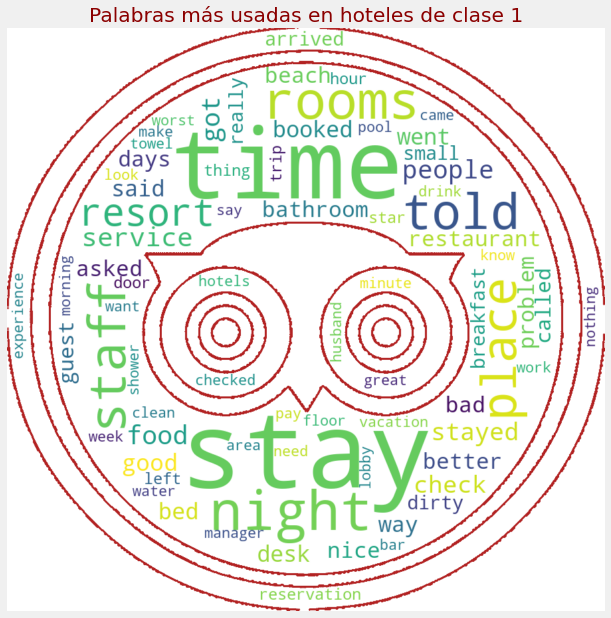

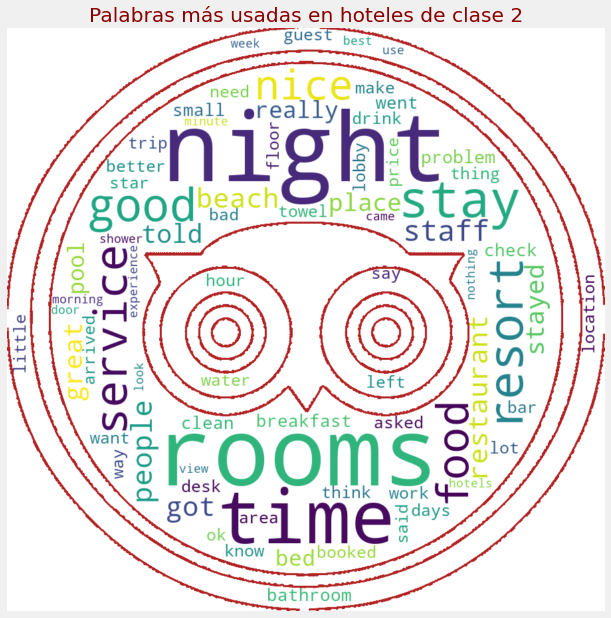

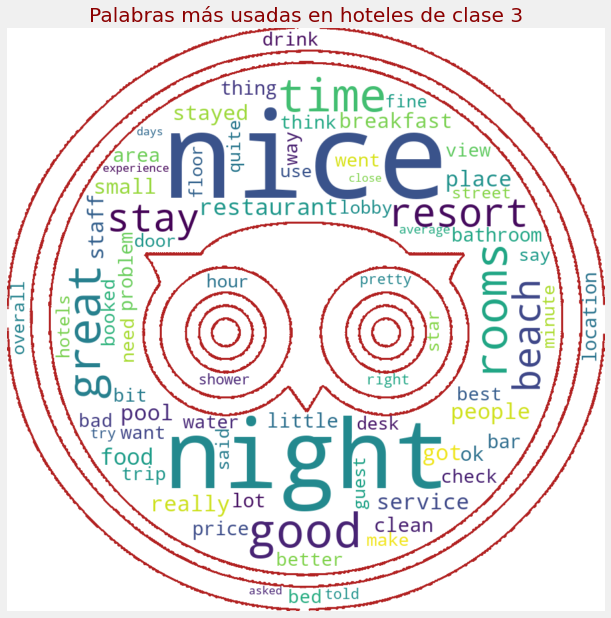

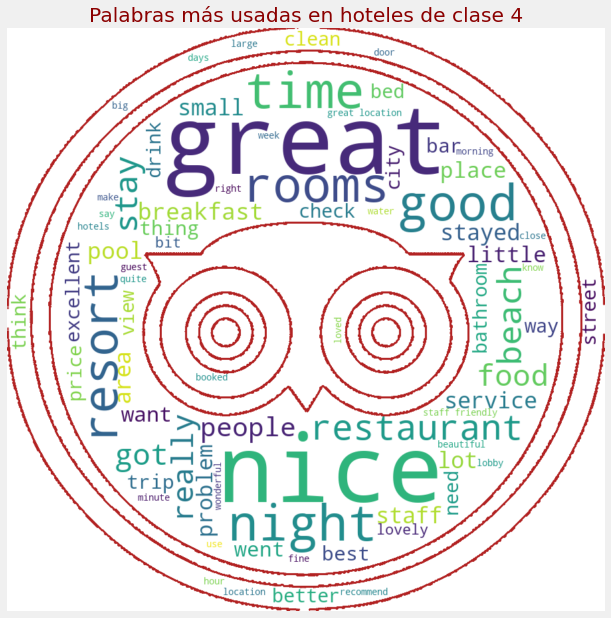

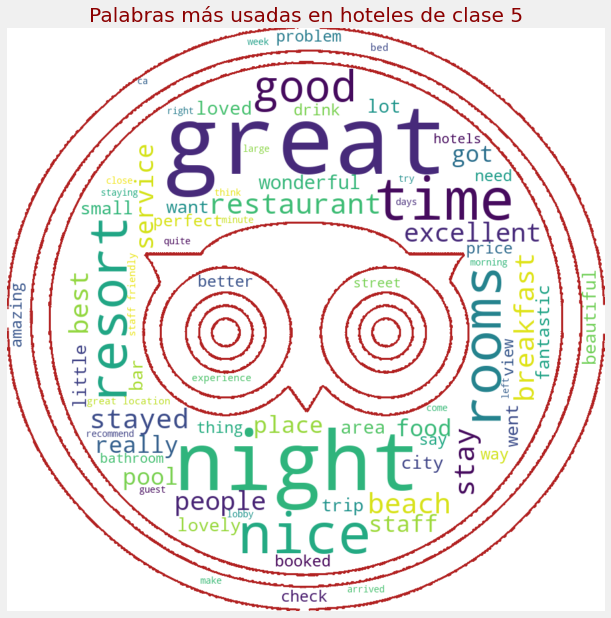

Wall time: 12.1 s


In [34]:
%%time
mask = np.array(Image.open("tripadvisor-logo.png"))
mask[(mask!=255) & (mask!=0)]=255
for i in range(1,6):
    comentarios_tipo_hotel=comentarios[comentarios["Rating"]==i]
    texto=adjuntar_texto(comentarios_tipo_hotel)
    word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white",mask=mask,
                           contour_width=3,contour_color='firebrick',max_font_size=256,random_state=1)
    word_cloud.generate(texto)
    plt.figure(figsize=(15,10))
    plt.title("Palabras más usadas en hoteles de clase {}".format(i),fontdict={'color':'darkred'})
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()